In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import glob

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
sharedFolder = '/work/group/egodat/reu23_clark/'
dataFolder = sharedFolder + 'data/'

# Load data

## Shape Files

In [3]:
#Load Core Based Statistical Areas (https://catalog.data.gov/dataset/tiger-line-shapefile-2019-nation-u-s-current-metropolitan-statistical-area-micropolitan-statist)
#CRS 3857: https://epsg.io/3857

CBSAs = geopandas.read_file(dataFolder + "tl_2019_us_cbsa.zip").to_crs(3857)
CBSAs = CBSAs[['CBSAFP', 'NAME', 'geometry']]
CBSAs['CBSAFP'] = CBSAs['CBSAFP'].astype(int)
CBSAs.rename(columns={'CBSAFP': 'CBSA'}, inplace=True)
CBSAs

,CBSA,NAME,geometry
0,12020,"Athens-Clarke County, GA","POLYGON ((-9299339.399 4024225.385, -9298722.4..."
1,12060,"Atlanta-Sandy Springs-Alpharetta, GA","POLYGON ((-9499808.416 3982318.514, -9499830.0..."
2,12100,"Atlantic City-Hammonton, NJ","POLYGON ((-8333014.948 4782122.394, -8333009.7..."
3,12120,"Atmore, AL","POLYGON ((-9753303.463 3638074.432, -9753303.2..."
4,12140,"Auburn, IN","POLYGON ((-9483635.192 5068556.085, -9483636.4..."
...,...,...,...
933,49060,"Winfield, KS","POLYGON ((-10814782.844 4481524.994, -10814783..."
934,49080,"Winnemucca, NV","POLYGON ((-13233024.775 5006594.818, -13233215..."
935,49100,"Winona, MN","POLYGON ((-10250133.062 5468589.383, -10250142..."
936,49180,"Winston-Salem, NC","POLYGON ((-8955841.577 4336663.225, -8955841.5..."


In [4]:
statesShp = geopandas.read_file(dataFolder + "cb_2018_us_state_500k.zip").to_crs(3857)
statesShp = statesShp[['GEOID', 'STUSPS', 'NAME', 'geometry']]

# contUS = ['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
# statesShp = statesShp[statesShp['STUSPS'].isin(contUS)] #Only use continental US

def plotUS():
    ax = statesShp.plot(figsize=(20, 10))
    ax.axis('equal')
    plt.xlim(-1.5e7, -0.7e7)
    plt.ylim(2.5e6, 7e6)
    return ax

In [5]:
year = '2020'

## Load Internet Speed Data
Takes some time. Skip if result is already saved in sharedFolder/data/internet_speed.pkl

In [6]:
# gdf = geopandas.read_file(dataFolder + "internet_speed/" + year + "-q1/gps_fixed_tiles.shp").to_crs(3857)
# gdf.to_pickle(dataFolder + "internet_speed/" + year + "-q1/gps_fixed_tiles_shp.pkl")
# print('.')
# gdf = geopandas.read_file(dataFolder + "internet_speed/" + year + "-q2/gps_fixed_tiles.shp").to_crs(3857)
# gdf.to_pickle(dataFolder + "internet_speed/" + year + "-q2/gps_fixed_tiles_shp.pkl")
# print('.')
# gdf = geopandas.read_file(dataFolder + "internet_speed/" + year + "-q3/gps_fixed_tiles.shp").to_crs(3857)
# gdf.to_pickle(dataFolder + "internet_speed/" + year + "-q3/gps_fixed_tiles_shp.pkl")
# print('.')
# gdf = geopandas.read_file(dataFolder + "internet_speed/" + year + "-q4/gps_fixed_tiles.shp").to_crs(3857)
# gdf.to_pickle(dataFolder + "internet_speed/" + year + "-q4/gps_fixed_tiles_shp.pkl")

speedDataq1 = pd.read_pickle(dataFolder + "internet_speed/" + year + "-q1/gps_fixed_tiles_shp.pkl")
speedDataq2 = pd.read_pickle(dataFolder + "internet_speed/" + year + "-q2/gps_fixed_tiles_shp.pkl")
speedDataq3 = pd.read_pickle(dataFolder + "internet_speed/" + year + "-q3/gps_fixed_tiles_shp.pkl")
speedDataq4 = pd.read_pickle(dataFolder + "internet_speed/" + year + "-q4/gps_fixed_tiles_shp.pkl")

speedData = pd.concat([speedDataq1, speedDataq2, speedDataq3, speedDataq4])
speedData = speedData[['avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices', 'geometry']]

speedData

,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
0,16599,13312,70,37,27,"POLYGON ((11876479.707 -703832.156, 11877091.2..."
1,42461,13516,19,171,53,"POLYGON ((16146557.855 -4555035.390, 16147169...."
2,25765,15185,16,228,100,"POLYGON ((-1016918.224 4680392.116, -1016306.7..."
3,79703,15579,18,199,32,"POLYGON ((150428.072 6689768.716, 151039.568 6..."
4,27032,24622,23,174,55,"POLYGON ((8443539.892 3621280.652, 8444151.389..."
...,...,...,...,...,...,...
6304982,1497,2799,32,1,1,"POLYGON ((-4425398.190 -539339.672, -4424786.6..."
6304983,5803,716,9,1,1,"POLYGON ((5989605.536 7759887.112, 5990217.033..."
6304984,20564,156858,5,1,1,"POLYGON ((12240931.458 4838769.639, 12241542.9..."
6304985,33630,35034,3,1,1,"POLYGON ((11840401.429 1184468.190, 11841012.9..."


In [7]:
speedData['geometry'] = speedData.centroid #Regions are small enough to treat as a point (also good for speed)

In [8]:
#Get CBSA for each point
speedData = geopandas.sjoin(speedData, CBSAs)
speedData

,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,index_right,CBSA,NAME
5,166797,55407,18,38,10,POINT (-10921628.349 3466266.359),764,41700,"San Antonio-New Braunfels, TX"
166,134494,70086,19,66,23,POINT (-10946088.199 3450978.953),764,41700,"San Antonio-New Braunfels, TX"
565,14577,4065,247,20,3,POINT (-10944253.710 3425907.608),764,41700,"San Antonio-New Braunfels, TX"
1122,164032,26609,20,50,26,POINT (-10976051.514 3449144.464),764,41700,"San Antonio-New Braunfels, TX"
1680,221340,121899,11,101,19,POINT (-10985835.453 3428965.089),764,41700,"San Antonio-New Braunfels, TX"
...,...,...,...,...,...,...,...,...,...
5753948,79407,21457,3,2,1,POINT (-10594477.868 5335610.322),820,43980,"Spencer, IA"
6058066,1076,1140,724,1,1,POINT (-10603038.816 5304424.015),820,43980,"Spencer, IA"
6127572,43358,11590,4,1,1,POINT (-10590808.891 5331941.345),820,43980,"Spencer, IA"
6157365,125277,17628,42,1,1,POINT (-10593254.876 5334998.826),820,43980,"Spencer, IA"


In [9]:
speedData.to_pickle(dataFolder + "internet_speed/data" + year + ".pkl")

# Analysis

In [39]:
speedData = pd.read_pickle(dataFolder + "internet_speed/data" + year + ".pkl")

In [11]:
#Compute weighted average speed for all points in a CBSA
speedData['u_kbps_scaled'] = speedData['avg_u_kbps'] * speedData['devices']
speedData['d_kbps_scaled'] = speedData['avg_d_kbps'] * speedData['devices']
speedByCBSA = speedData.groupby(by='CBSA').sum()
speedByCBSA['avg_u_kbps'] = speedByCBSA['u_kbps_scaled'] / speedByCBSA['devices']
speedByCBSA['avg_d_kbps'] = speedByCBSA['d_kbps_scaled'] / speedByCBSA['devices']
speedByCBSA = speedByCBSA.drop(columns=['u_kbps_scaled', 'd_kbps_scaled'])

gdf = pd.merge(CBSAs, speedByCBSA, on='CBSA')
gdf

,CBSA,NAME,geometry,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,index_right
0,12020,"Athens-Clarke County, GA","POLYGON ((-9299339.399 4024225.385, -9298722.4...",129484.624928,34063.329612,279044,54472,17378,0
1,12060,"Atlanta-Sandy Springs-Alpharetta, GA","POLYGON ((-9499808.416 3982318.514, -9499830.0...",163152.967475,70054.833455,3252841,2289004,608184,120955
2,12100,"Atlantic City-Hammonton, NJ","POLYGON ((-8333014.948 4782122.394, -8333009.7...",170279.047127,19645.113370,102720,68998,18885,10420
3,12120,"Atmore, AL","POLYGON ((-9753303.463 3638074.432, -9753303.2...",76250.219863,13761.808869,129508,4691,1601,2694
4,12140,"Auburn, IN","POLYGON ((-9483635.192 5068556.085, -9483636.4...",94066.435632,30009.955608,104734,11349,3379,5308
...,...,...,...,...,...,...,...,...,...
933,49060,"Winfield, KS","POLYGON ((-10814782.844 4481524.994, -10814783...",93989.507895,13763.863816,40850,4890,1520,767859
934,49080,"Winnemucca, NV","POLYGON ((-13233024.775 5006594.818, -13233215...",19163.027682,5101.784602,16871,5014,1156,417498
935,49100,"Winona, MN","POLYGON ((-10250133.062 5468589.383, -10250142...",86987.973569,24839.072752,59642,12464,3670,1443640
936,49180,"Winston-Salem, NC","POLYGON ((-8955841.577 4336663.225, -8955841.5...",134864.300134,41055.061191,579601,202947,60663,20826936


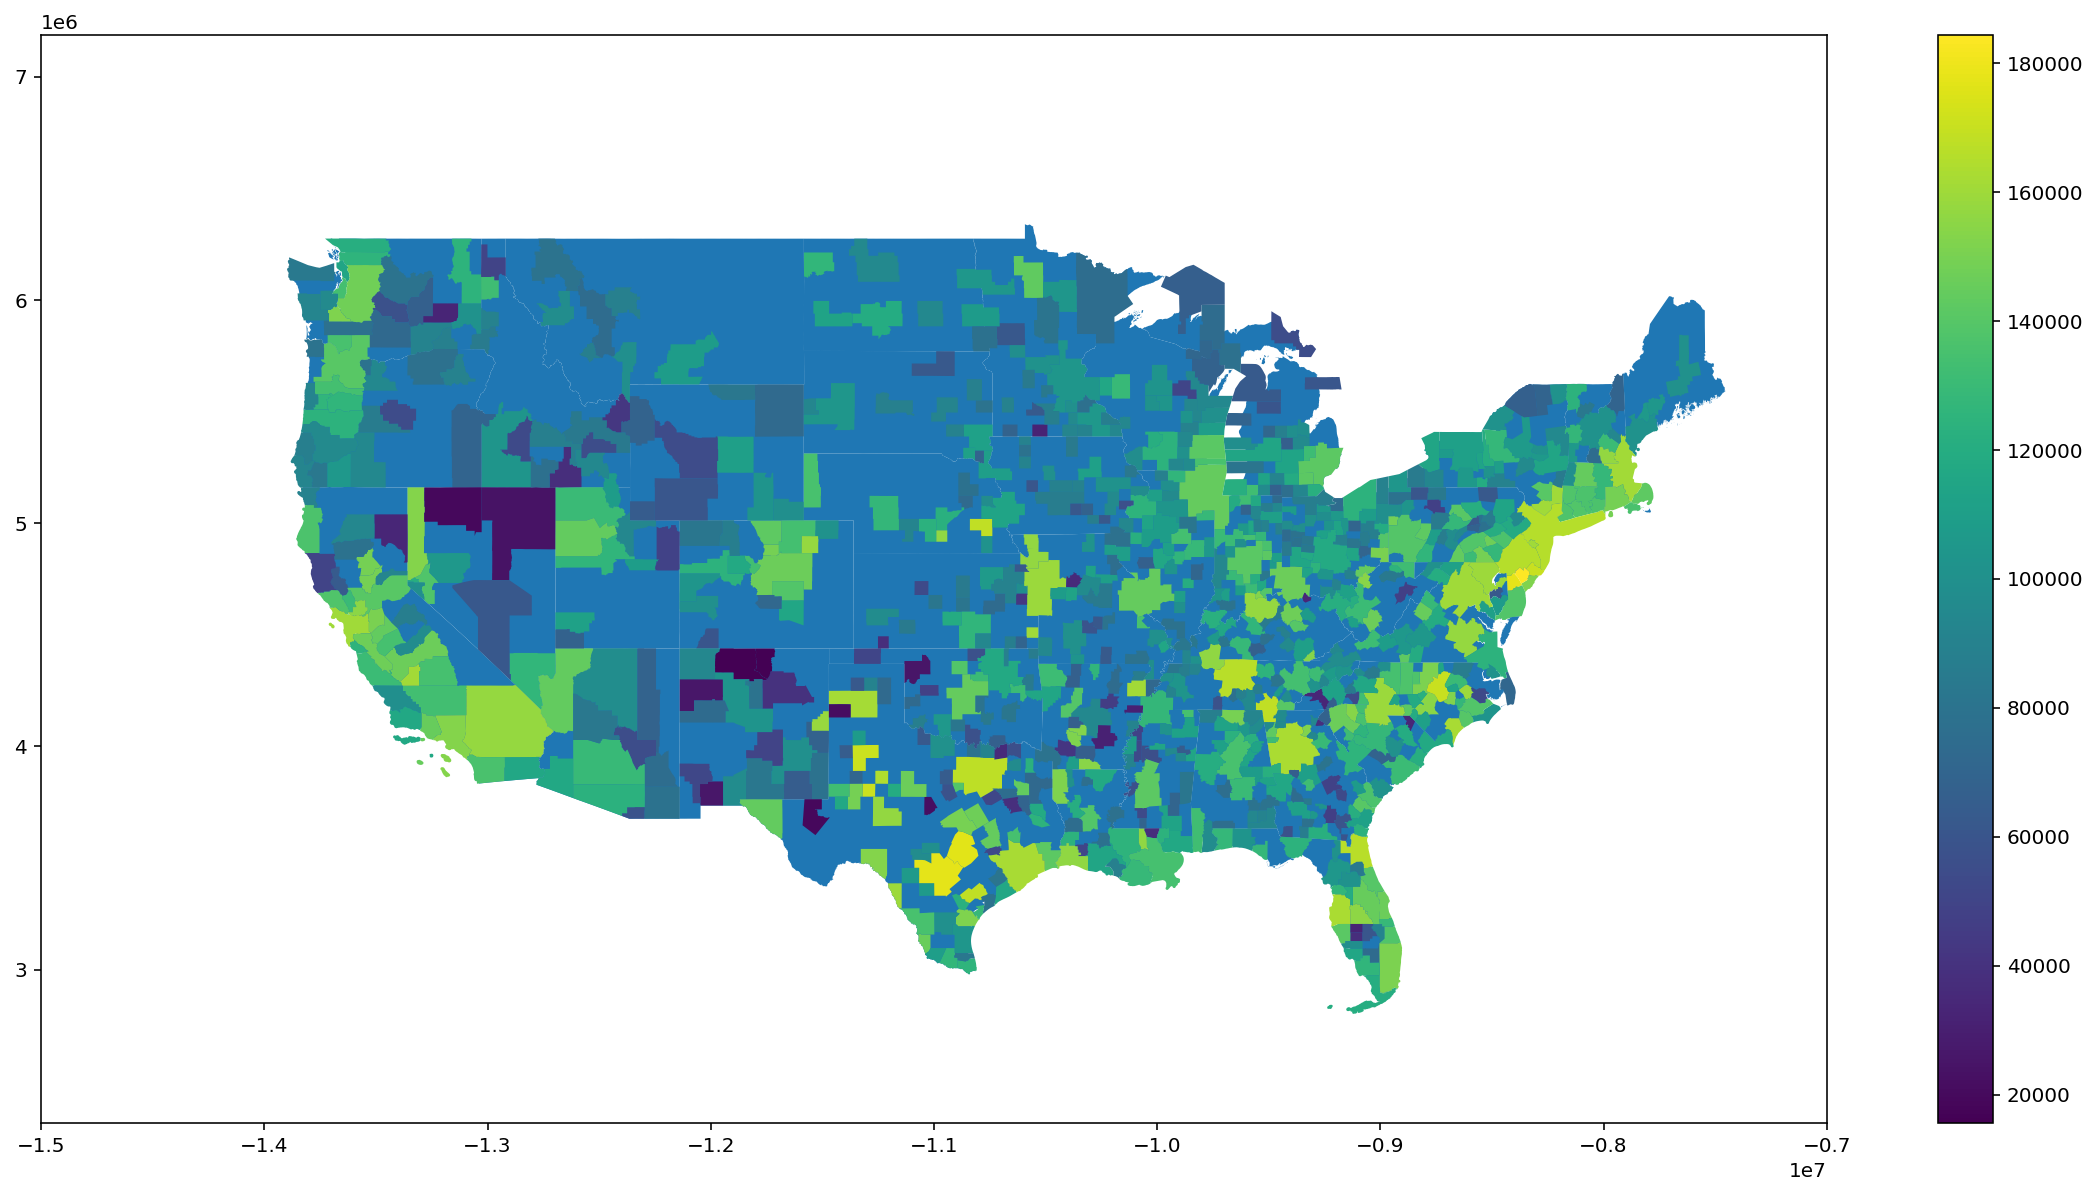

In [12]:
ax = plotUS()
gdf.plot(ax=ax, column='avg_d_kbps', legend=True);

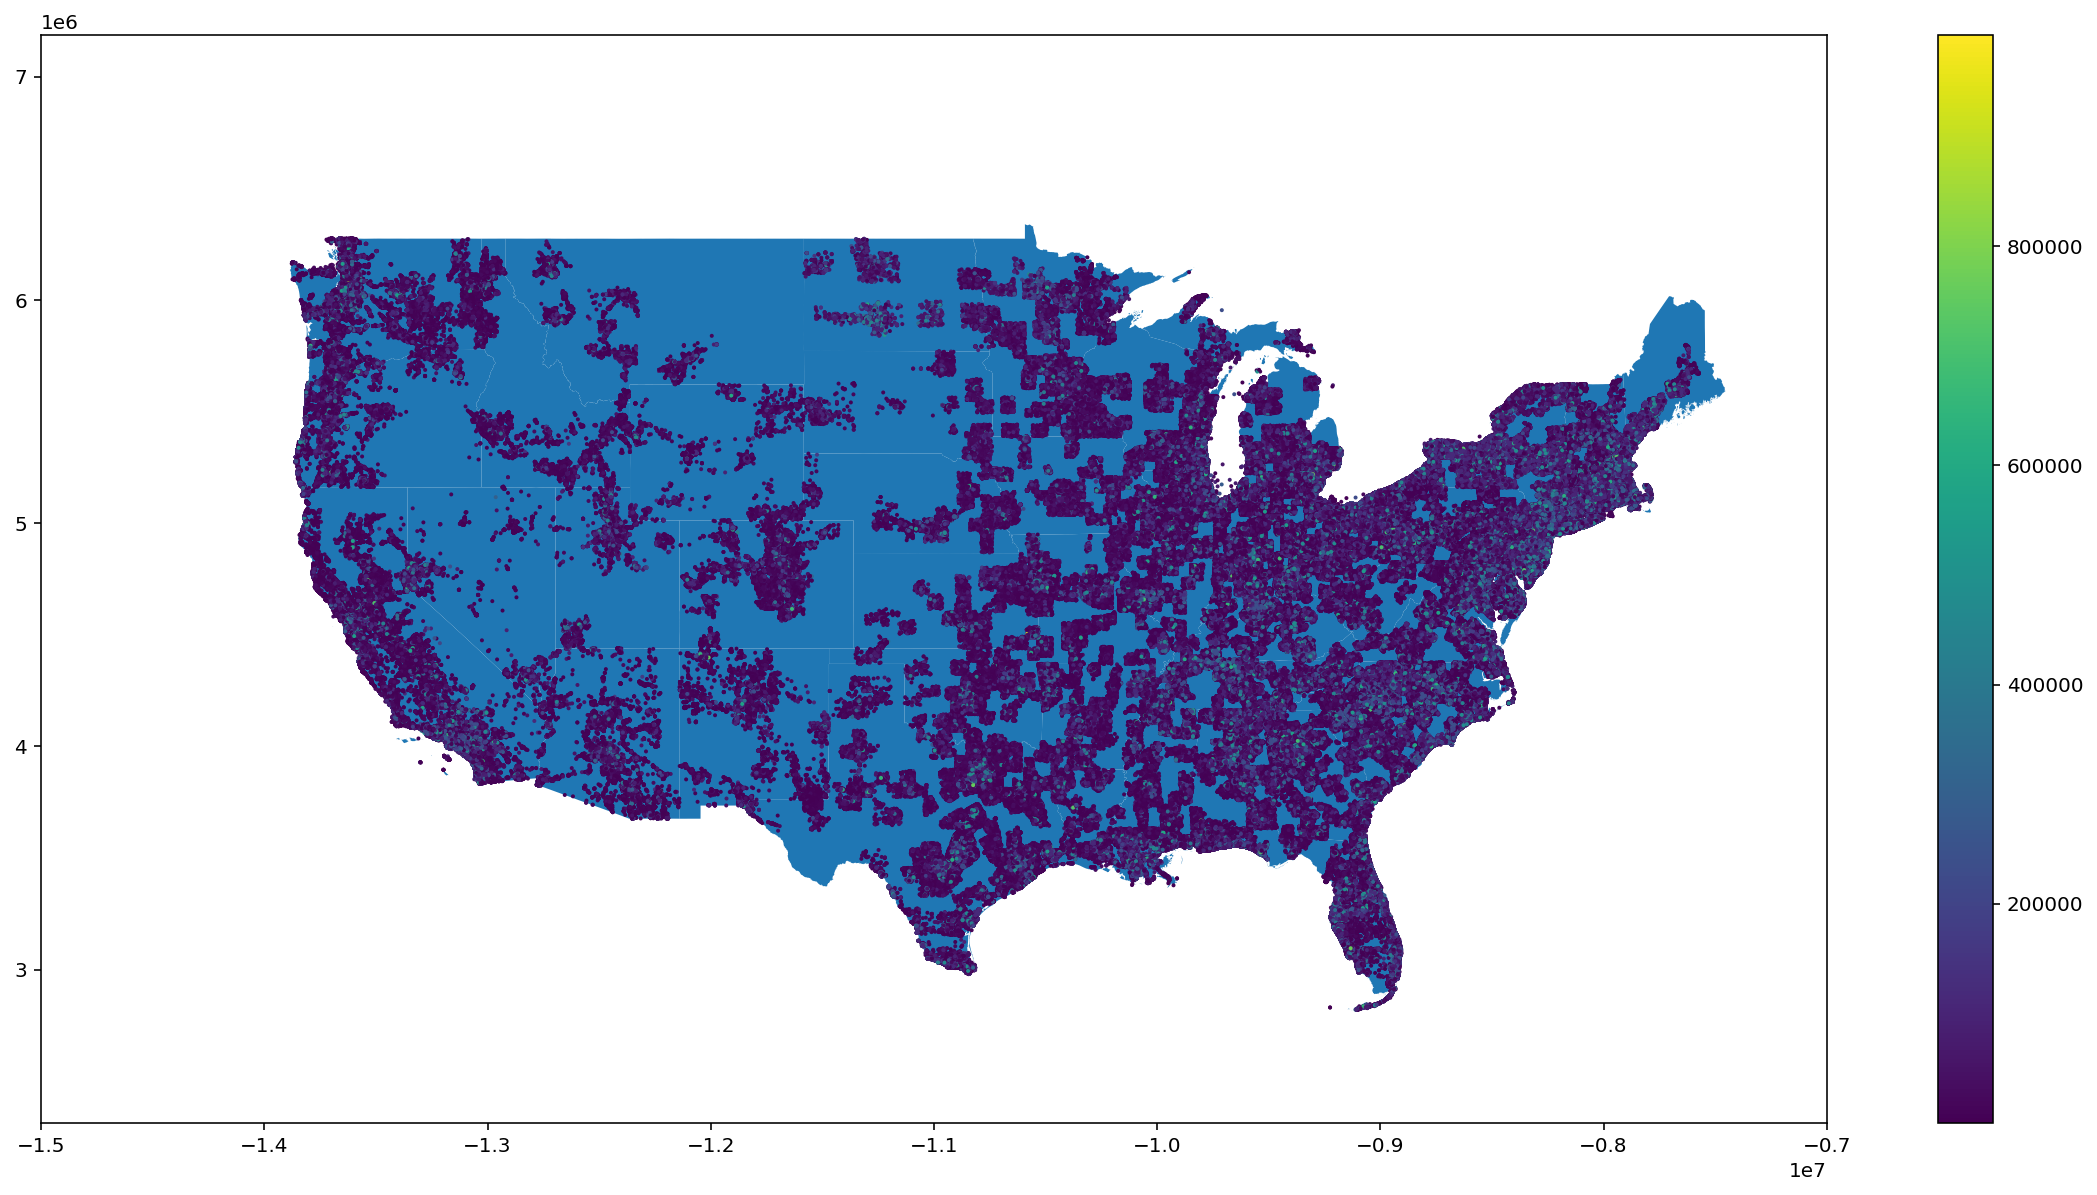

In [13]:
ax = plotUS()
speedData.plot(ax=ax, column='avg_d_kbps', marker='o', markersize=1, legend=True);

In [14]:
gdf.to_pickle(dataFolder + "internet_speed/speedByCbsa" + year + ".pkl")